In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [13]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(16, activation = 'relu', name = 'layer_1'),
    Dense(16, activation= 'relu'),
    Dense(10, activation = 'softmax')
])


In [11]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.00461801, -0.0783053 , -0.06680288, ..., -0.02211471,
          0.03688447, -0.06595982],
        [-0.04695302,  0.01565803,  0.07338028, ...,  0.07518134,
         -0.06005015, -0.04977111],
        [-0.02535226,  0.01885484,  0.0783096 , ..., -0.02165004,
          0.00129343, -0.04003233],
        ...,
        [ 0.05592795,  0.01557601,  0.01440207, ..., -0.06661214,
          0.05086783,  0.01071646],
        [ 0.03648255,  0.01366635, -0.0817183 , ..., -0.03608946,
         -0.04963884, -0.07373453],
        [ 0.02873892, -0.00282553, -0.02590632, ..., -0.01787879,
          0.03375276,  0.07096912]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 0.4068264 ,  0.2616031 ,  0.29128852, -0.382

In [14]:
# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [60]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3,3), activation= 'relu', input_shape = (28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])


In [40]:
# Print the model summary
model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [61]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer= opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = [acc, mae])


In [47]:
# Print the resulting model attributes
model.loss


'sparse_categorical_crossentropy'

***
<a id="coding_tutorial_4"></a>
## The fit method

In [41]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [48]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [49]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [50]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [52]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/ 255
test_images = test_images / 255


Sandal


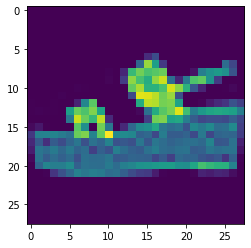

In [56]:
# Display one of the images
plt.imshow(train_images[12])
print(labels[train_labels[12]])

#### Fit the model

In [63]:
# Fit the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs = 10, batch_size=256)


Epoch 1/10
235/235 [==============================] - 13s 55ms/step - loss: 0.3035 - sparse_categorical_accuracy: 0.8907 - mean_absolute_error: 4.4200
Epoch 2/10
235/235 [==============================] - 13s 55ms/step - loss: 0.2956 - sparse_categorical_accuracy: 0.8935 - mean_absolute_error: 4.4200
Epoch 3/10
235/235 [==============================] - 13s 55ms/step - loss: 0.2870 - sparse_categorical_accuracy: 0.8970 - mean_absolute_error: 4.4200
Epoch 4/10
235/235 [==============================] - 13s 55ms/step - loss: 0.2808 - sparse_categorical_accuracy: 0.8982 - mean_absolute_error: 4.4200
Epoch 5/10
235/235 [==============================] - 13s 55ms/step - loss: 0.2762 - sparse_categorical_accuracy: 0.9010 - mean_absolute_error: 4.4200
Epoch 6/10
235/235 [==============================] - 13s 56ms/step - loss: 0.2715 - sparse_categorical_accuracy: 0.9025 - mean_absolute_error: 4.4200
Epoch 7/10
235/235 [==============================] - 13s 55ms/step - loss: 0.2664 - sparse_ca

#### Plot training history

In [65]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.303479,0.890717,4.419997
1,0.295567,0.893517,4.420000
2,0.287025,0.896950,4.420000
3,0.280778,0.898200,4.420001
4,0.276183,0.901000,4.420001
5,0.271537,0.902550,4.420000
6,0.266432,0.904117,4.420000
7,0.263193,0.905400,4.419999
8,0.258312,0.906833,4.420001
9,0.255941,0.907650,4.420001


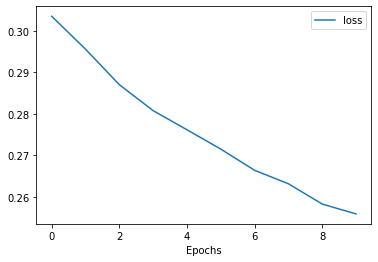

In [68]:
# Make a plot for the loss
df.plot(y = 'loss', xlabel = 'Epochs')


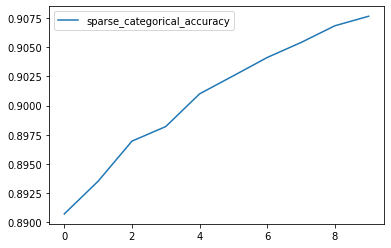

In [69]:
# Make a plot for the accuracy
df.plot(y = 'sparse_categorical_accuracy')


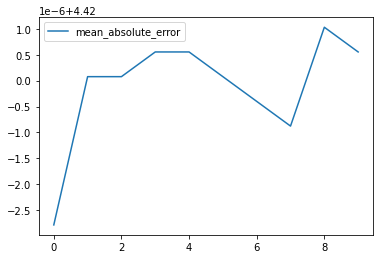

In [70]:
# Make a plot for the additional metric
df.plot(y = 'mean_absolute_error')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [72]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [76]:
test_images[..., np.newaxis].shape

(10000, 28, 28, 1)

In [73]:
# Evaluate the model
model.evaluate(test_images[..., np.newaxis], test_labels)


313/313 [==============================] - 2s 5ms/step - loss: 0.3015 - sparse_categorical_accuracy: 0.8927 - mean_absolute_error: 4.4200


[0.3014564514160156, 0.8927000164985657, 4.419997215270996]

#### Make predictions from the model

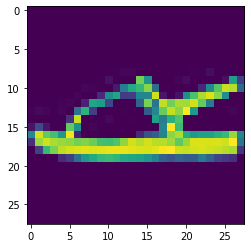

Label: Sandal


In [84]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [85]:
# Get the model predictions
predictions = model.predict(test_image[None, ..., None])
print(labels[np.argmax(predictions)])

Sandal
